#### Naive Bays Classifier

$$ P(A|B) \quad =\quad \frac {P(A).P(B|A)} {p(B)} $$

4 - head

2 - tail

p(head) = 4 / 6

p(tail) = 2 / 6

    likelyhood == probability [ categorical data ]

multinomial classification

prediction -> p(play=yes|(rain=yes)*(temp=high)*(humidity=low)

In [ ]:
p(play=yes|rain=yes) = 

$$ P(A|B) \quad =\quad \frac {P(A).P(B|A)} {p(B)} $$

P(A) = (priror Probability)


P(B|A) = (likelihood)

P(B) = (Normalizing constant)

P(A|B) = (Posterior Probability)

$$\text {Posterior Probability} \quad = \quad \frac {\text {(Prior Probability)}.\text{(Likelihood)} } {\text {(Normalizing Constant)}}$$

A = (play=yes)
B = (rain=yes)

$$ P(play=yes|rain=yes) = \frac {p(play=yes)* p(rain=yes|play=yes)} {P(rain=yes)} $$

## Training Data 
p(play = yes) --> 7 / 11

p(rain=yes) -->  4 / 11

p(rain=yes|play=yes) -->  1 / 7

## prediction 

p(play=yes|rain=yes) = 1 / 4

p(play=no|rain=yes) = ? 

yes > no --> predict yes

no > yes --> predict no 

In [ ]:
Training Data

play  rain

yes    yes - 1
no     no
yes    no  - 2
yes    no  - 3
yes    no  - 4
no     yes 
yes    no  - 5
no     yes 
yes    no  - 6 
yes    no  - 7
no     yes 

rotal events = 11

p(yes) = 7 / 11

p(no)  = 4 / 11 

p(play=yes|rain=yes) = 1 / 4

p(play=yes|rain=no) = 6 / 11 

p(play=no|rain=yes) = 3 / 11

p(play=no|rain=no) =  1 / 11



### Navie Bays

        all feature are un-related and has equal priority

yes / no 

wind 

rain

temp 

humidity

p(wind) * p(rain) = p(rain)*p(wind)

#### Spam Classification

message -> ham / spam

In [4]:
from tqdm import tqdm 
from time import sleep
for _ in tqdm(range(300)):
    sleep(1)

100%|███████████████████████████████████████████████████████████████████████| 300/300 [05:00<00:00,  1.00s/it]


__Step-1__ Data Collection

In [8]:
!head SMSSpamCollection

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam

In [9]:
import pandas as pd

In [25]:
data = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['class', 'message'])

In [26]:
data.shape

(5572, 2)

In [27]:
pd.set_option('display.max_colwidth', -1)

In [28]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [29]:
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

In [31]:
import seaborn as sns

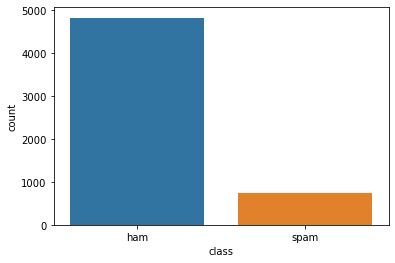

In [33]:
sns.countplot(data['class'])
plt.show()

In [34]:
common_stop_words = [ 'are', 'is', 'a']

### NLP

!python -m pip install nltk

In [35]:
from nltk.corpus import stopwords

In [46]:
eng = stopwords.words('english')

In [ ]:
'hello world how are you'

In [40]:
words = []
for msg in data['message'].values:
    for word in msg.split():
        words.append(word.lower())

In [41]:
len(words)

86909

In [42]:
data.shape

(5572, 2)

In [43]:
words = pd.Series(words)

In [45]:
words.unique().shape

(13579,)

In [51]:
sp_words = words[~words.isin(eng)]

In [52]:
cm_words = words[words.isin(eng)]

In [53]:
sp_words.shape

(55434,)

In [54]:
cm_words.shape

(31475,)

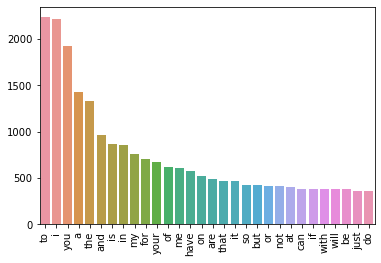

In [57]:
x = cm_words.value_counts()[:30]
sns.barplot(x.index, x.values)
plt.xticks(rotation=90)
plt.show()

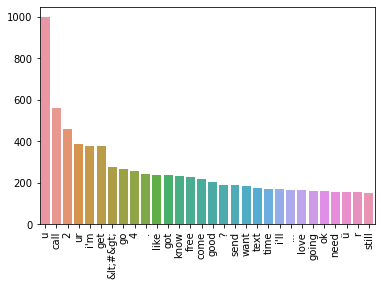

In [58]:
x = sp_words.value_counts()[:30]
sns.barplot(x.index, x.values)
plt.xticks(rotation=90)
plt.show()

In [61]:
sp_words.value_counts()[:30].index

Index(['u', 'call', '2', 'ur', 'i'm', 'get', '&lt;#&gt;', 'go', '4', '.',
       'like', 'got', 'know', 'free', 'come', 'good', '?', 'send', 'want',
       'text', 'time', 'i'll', '...', 'love', 'going', 'ok', 'need', 'ü', 'r',
       'still'],
      dtype='object')

In [62]:
new_stop_words = [ 'u', 'call', '2', 'ur', "i'm", '&lt;#&gt;', '?', "i'll", 'good']

In [64]:
stop_words = eng + new_stop_words

In [69]:
def remove_stop_words(m):
    return ' '.join([ word.lower() for word in m.split() if word.lower() not in stop_words ])

In [71]:
old_data = data.copy()

In [72]:
data['message'] = data['message'].apply(remove_stop_words)

In [73]:
data['message']

0       go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...                                                
1       ok lar... joking wif oni...                                                                                                                
2       free entry wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's
3       dun say early hor... c already say...                                                                                                      
4       nah think goes usf, lives around though                                                                                                    
                         ...                                                                                                                       
5567    2nd time tried contact u. £750 pound prize. claim easy, 087187272008 now1! 10p per minute. bt-national-r

In [74]:
old_data['message']

0       Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                                 
1       Ok lar... Joking wif u oni...                                                                                                                                   
2       Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's     
3       U dun say so early hor... U c already then say...                                                                                                               
4       Nah I don't think he goes to usf, he lives around here though                                                                                                   
                                    ...                                                                                                                    

In [75]:
data.head()

,class,message
0,ham,"go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat..."
1,ham,ok lar... joking wif oni...
2,spam,free entry wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's
3,ham,dun say early hor... c already say...
4,ham,"nah think goes usf, lives around though"


### Stop words remove

### Stemming

    come

    came

    coming


    cry

    crying

    cried 



In [77]:
words = [ 'come', 'coming', 'came', 'cry', 'crying', 'program', 'programmer', 'programmers',
        'programming', 'comes', 'cries']

In [78]:
from nltk.stem import PorterStemmer

NLP 

In [79]:
ps = PorterStemmer()

In [88]:
for word in words:
    nw = ps.stem(word)
    print(f"{word:>20} --> {nw}")

                come --> come
              coming --> come
                came --> came
                 cry --> cri
              crying --> cri
             program --> program
          programmer --> programm
         programmers --> programm
         programming --> program
               comes --> come
               cries --> cri


In [92]:
ps = PorterStemmer()
def stemming(message):
    return ' '.join([ ps.stem(word) for word in message.split() ])

In [93]:
stemming("he like likes liking ")

'he like like like'

In [95]:
data['message']  = data['message'].apply(stemming)

In [96]:
data.head()

,class,message
0,ham,"go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat..."
1,ham,ok lar... joke wif oni...
2,spam,free entri wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18'
3,ham,dun say earli hor... c alreadi say...
4,ham,"nah think goe usf, live around though"


In [100]:
ham = data[data['class'] =='ham']['message']
spam = data[data['class'] =='spam']['message']

In [111]:
ham_words = []
for msg in ham.values:
    ham_words.extend(msg.split())
    

In [110]:
spam_words = []
for msg in spam.values:
    spam_words.extend(msg.split())

In [112]:
ham_words = pd.Series(ham_words)
spam_words = pd.Series(spam_words)

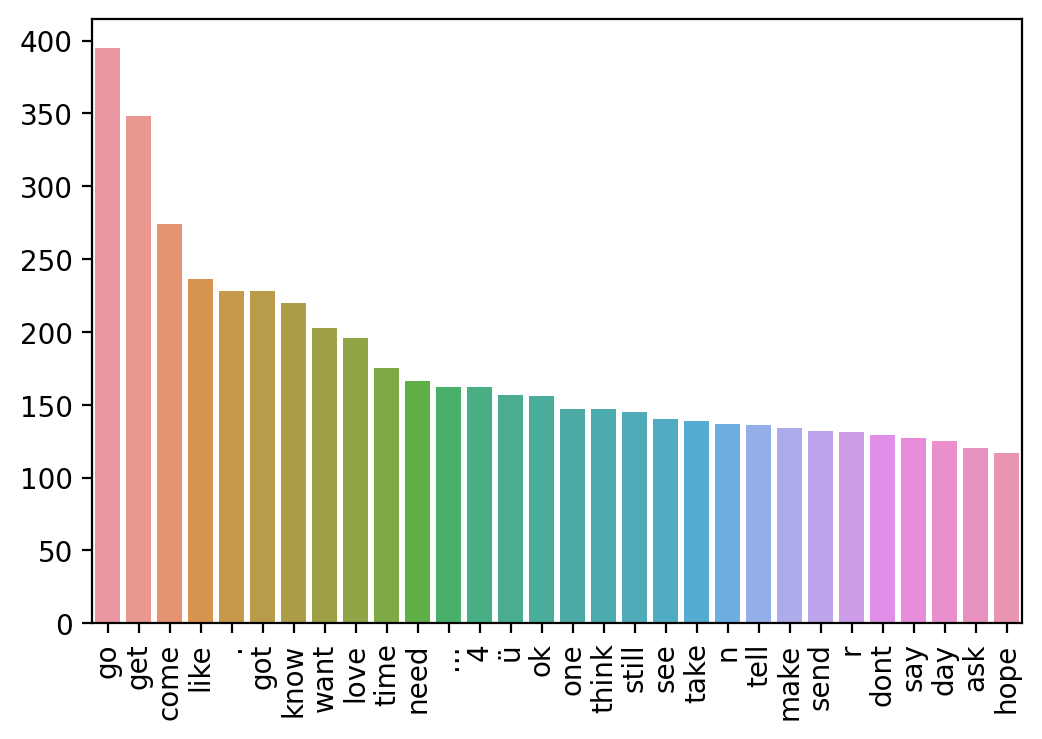

In [114]:
w = ham_words.value_counts()[:30]
plt.figure(dpi=200)
sns.barplot(w.index, w.values)
plt.xticks(rotation=90)
plt.show()

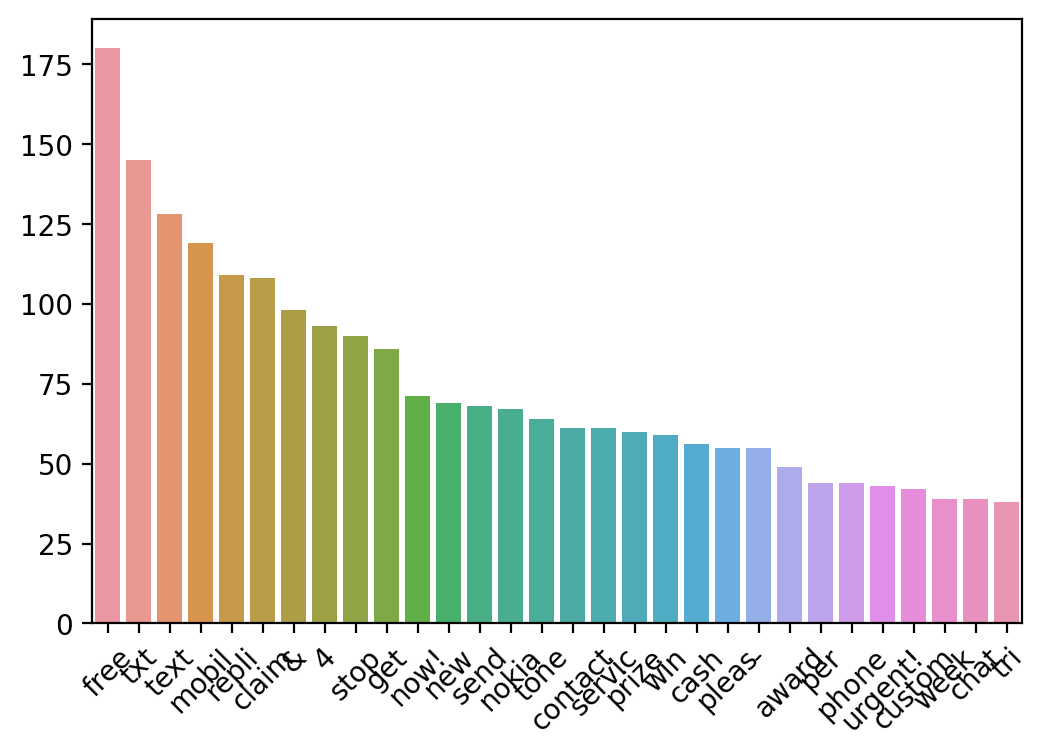

In [120]:
w = spam_words.value_counts()[:30]
plt.figure(dpi=200)
sns.barplot(w.index, w.values)
plt.xticks(rotation=45)
plt.show()

pip install wordcloud

In [118]:
!pip install wordcloud

In [119]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [153]:
w = WordCloud(background_color='#eeeeee', max_words=50, max_font_size=50)

In [154]:
ham_words

0        go     
1        jurong 
2        point, 
3        crazy..
4        avail  
         ...    
39553    us     
39554    free   
39555    rofl.  
39556    true   
39557    name   
Length: 39558, dtype: object

In [155]:
wordcloud = w.generate(' '.join([word for word in ham_words.values]))

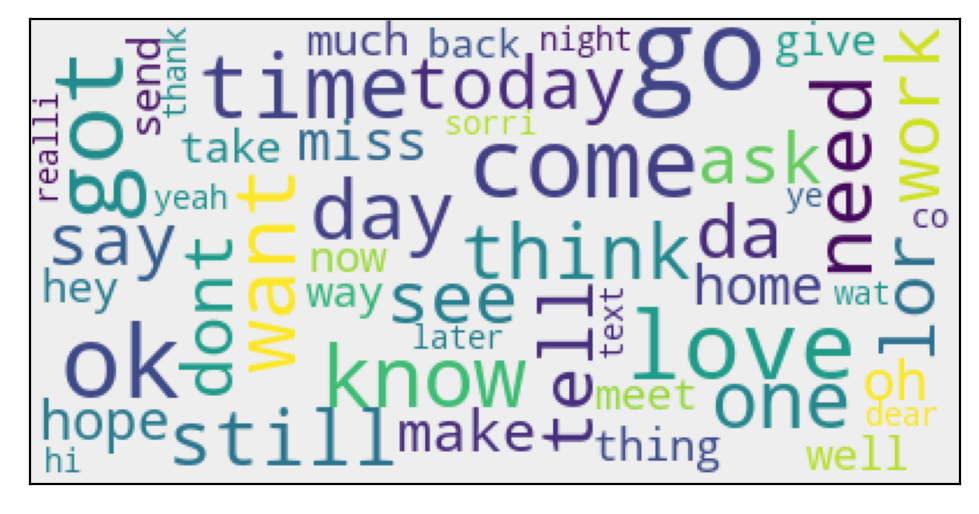

In [156]:
plt.figure(dpi=200)
plt.imshow(wordcloud)
plt.xticks([])
plt.yticks([])
plt.show()

In [157]:
wordcloud = w.generate(' '.join([word for word in spam_words.values]))

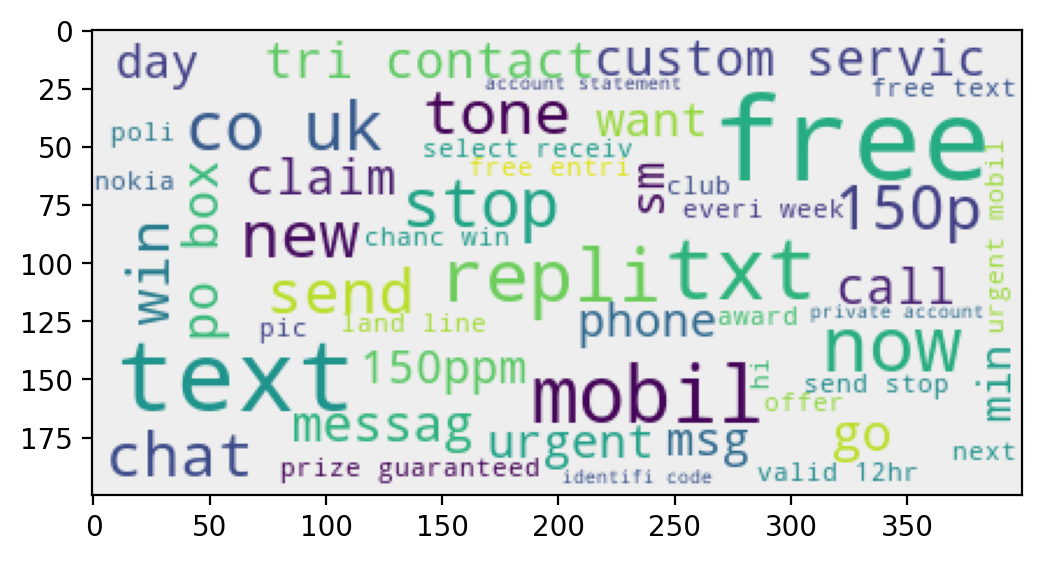

In [158]:
plt.figure(dpi=200)
plt.imshow(wordcloud)
plt.show()

In [160]:
wordcloud.to_file('myfile.jpg')

In [162]:
from IPython.display import Image

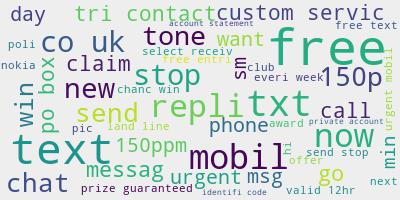

In [164]:
Image('myfile.jpg')

In [165]:
data

,class,message
0,ham,"go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat..."
1,ham,ok lar... joke wif oni...
2,spam,free entri wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18'
3,ham,dun say earli hor... c alreadi say...
4,ham,"nah think goe usf, live around though"
...,...,...
5567,spam,"2nd time tri contact u. £750 pound prize. claim easy, 087187272008 now1! 10p per minute. bt-national-rate."
5568,ham,ü b go esplanad fr home?
5569,ham,"pity, * mood that. so...ani suggestions?"
5570,ham,guy bitch act like i'd interest buy someth els next week gave us free


#### Bag of Words

In [180]:
message = [
    
    'hello hello world how are you ? ',
    'python is awesome python', 
    'hello this is awesome'
    
]

In [183]:
corpus = []
for msg in message:
    for word in msg.split():
        if word.lower().strip() not in corpus:
            corpus.append(word)

In [185]:
print(corpus) # vocab

['hello', 'world', 'how', 'are', 'you', '?', 'python', 'is', 'awesome', 'this']


In [186]:
word_dict = dict(zip(corpus, range(len(corpus))))

In [187]:
word_dict

{'hello': 0,
 'world': 1,
 'how': 2,
 'are': 3,
 'you': 4,
 '?': 5,
 'python': 6,
 'is': 7,
 'awesome': 8,
 'this': 9}

In [190]:
len(word_dict.keys())

10

vocab
[ 'hello', 'world', 'how', 'are', 'you', '?', 'python', 'is', 'awesome', 'this']

columns represent your corpus / vocab

In [192]:
message

['hello hello world how are you ? ',
 'python is awesome python',
 'hello this is awesome']

In [ ]:
mxv -> v is length of your vocab, m is document

In [193]:
[
    [2, 1, 1, 1, 1, 1, 0, 0, 0, 0], 
    
    [0, 0, 0, 0, 0, 0, 2, 1, 1, 0 ],
    
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 1]
    
]

[[2, 1, 1, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 1, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 1, 1]]

In [194]:
from sklearn.feature_extraction.text import CountVectorizer

In [195]:
model = CountVectorizer()

In [196]:
model.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [197]:
op = model.transform(message)

In [201]:
op.toarray()

array([[1, 0, 2, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 2, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 0]], dtype=int64)

In [202]:
model.vocabulary_

{'hello': 2,
 'world': 7,
 'how': 3,
 'are': 0,
 'you': 8,
 'python': 5,
 'is': 4,
 'awesome': 1,
 'this': 6}

In [203]:
[ 'are', 'awesome', 'hello', 'how', 'is', 'python', 'this', 'world', 'you']

['are', 'awesome', 'hello', 'how', 'is', 'python', 'this', 'world', 'you']

In [205]:
message

['hello hello world how are you ? ',
 'python is awesome python',
 'hello this is awesome']

In [207]:
op.toarray()

array([[1, 0, 2, 1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 2, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 0]], dtype=int64)

__step2__ Train Test Split

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
from sklearn.feature_extraction.text import CountVectorizer

In [210]:
vector = CountVectorizer()

In [211]:
vector.fit(data['message'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [212]:
features = vector.transform(data['message'])

In [215]:
features

<5572x8238 sparse matrix of type '<class 'numpy.int64'>'
	with 48435 stored elements in Compressed Sparse Row format>

In [216]:
target = data['class']
target.head()

0    ham 
1    ham 
2    spam
3    ham 
4    ham 
Name: class, dtype: object

In [217]:
X_train, X_test, y_train, y_test  = train_test_split(features, target)

In [218]:
X_train[:5]

<5x8238 sparse matrix of type '<class 'numpy.int64'>'
	with 59 stored elements in Compressed Sparse Row format>

In [220]:
y_train[:5]

2421    ham 
5129    ham 
2965    spam
1694    ham 
1112    ham 
Name: class, dtype: object

In [222]:
(y_train == 'ham').sum()

3625

In [223]:
(y_train == 'spam').sum()

554

In [224]:
(y_test == 'ham').sum()

1200

In [225]:
(y_test == 'spam').sum()

193

In [226]:
from sklearn.naive_bayes import MultinomialNB

In [227]:
model = MultinomialNB()

In [228]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [229]:
y_pred = model.predict(X_test)

In [230]:
y_pred[:5]

array(['ham', 'ham', 'ham', 'ham', 'ham'], dtype='<U4')

In [232]:
y_test[:5]

4807    ham
1621    ham
4495    ham
2847    ham
3430    ham
Name: class, dtype: object

In [233]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [234]:
print(confusion_matrix(y_test, y_pred))

[[1187   13]
 [  18  175]]


In [236]:
print(accuracy_score(y_test, y_pred)*100)

97.77458722182341


In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1200
        spam       0.93      0.91      0.92       193

    accuracy                           0.98      1393
   macro avg       0.96      0.95      0.95      1393
weighted avg       0.98      0.98      0.98      1393



##### spam or not

In [238]:
messages = [
    
    'hello, hey i need you urgently you can come my home ?',
    'free free freee absolute freee', 
    
    
]

In [239]:
t_msg = vector.transform(messages)

In [240]:
t_msg

<2x8238 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [241]:
model.predict(t_msg)

array(['ham', 'spam'], dtype='<U4')

    Sunday : R language

#### Spam Classfication

In [243]:
##vector.vocabulary_